<a href="https://colab.research.google.com/github/mcatrinque/brazilian_hydropower/blob/main/brazilian_hydropower_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ANÁLISE GEOESPACIAL NO SETOR HIDROELÉTRICO BRASILEIRO

Avaliação dos possíveis fatores para a tomada de decisão da construção de uma usina hidrelétrica em um ponto estratégico.

In [1]:
from google.colab import drive
drive.mount('/content/drive')
path = 'drive/My Drive/Colab Notebooks/hidreletrica/databases/'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
!pip install geopandas

In [3]:
import numpy as np
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [4]:
estados = gpd.read_file(path + 'lim_unidade_federacao')
estados = estados[['nome', 'sigla', 'geometry']]
estados.rename(columns = {'sigla':'UF', 'nome':'estado'}, inplace = True)
estados['coordenadas'] = estados['geometry'].centroid
estados.head()

<ipython-input-4-49229e81b1f7>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  estados['coordenadas'] = estados['geometry'].centroid


,estado,UF,geometry,coordenadas
0,Bahia,BA,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848...",POINT (-41.72018 -12.47296)
1,Pará,PA,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ...",POINT (-53.06254 -3.97218)
2,Rio de Janeiro,RJ,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938...",POINT (-42.66308 -22.19582)
3,São Paulo,SP,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777...",POINT (-48.72945 -22.26441)
4,Espírito Santo,ES,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372...",POINT (-40.66811 -19.57476)


#PRECIPITAÇÃO NO TERRITÓRIO BRASILEIRO
O volume de chuvas em uma pode pode influenciar a tomada de decisão na exploração de recursos hidrícos para a produção de energia.

Análise da Rede hidrometeorológica nacional, com base nos dados de precipitação média anual, dos anos de 1977 a 2006, produzidos pelo Serviço Geológico do Brasil (CPRM) e disponibilizados pelo Sistema Nacional de Informações sobre Recursos Hídricos (SNIRH).

Link: https://portal1.snirh.gov.br/ana/home/item.html?id=108056f3de114f848adc006201ca74cf

In [5]:
precipitacao = gpd.read_file(path + 'SNIRH_Isoietas')
precipitacao.rename(columns = {'PCP_NU_ISO':'chuva_mm'}, inplace = True)
precipitacao.head()

,chuva_mm,geometry
0,2100.0,"LINESTRING (-63.73016 -11.07136, -63.72910 -11..."
1,2000.0,"LINESTRING (-44.77450 -22.42481, -44.77438 -22..."
2,2100.0,"LINESTRING (-43.27034 -22.96332, -43.27034 -22..."
3,2100.0,"LINESTRING (-43.28128 -22.95964, -43.28139 -22..."
4,2800.0,"LINESTRING (-42.56608 -22.38085, -42.56619 -22..."


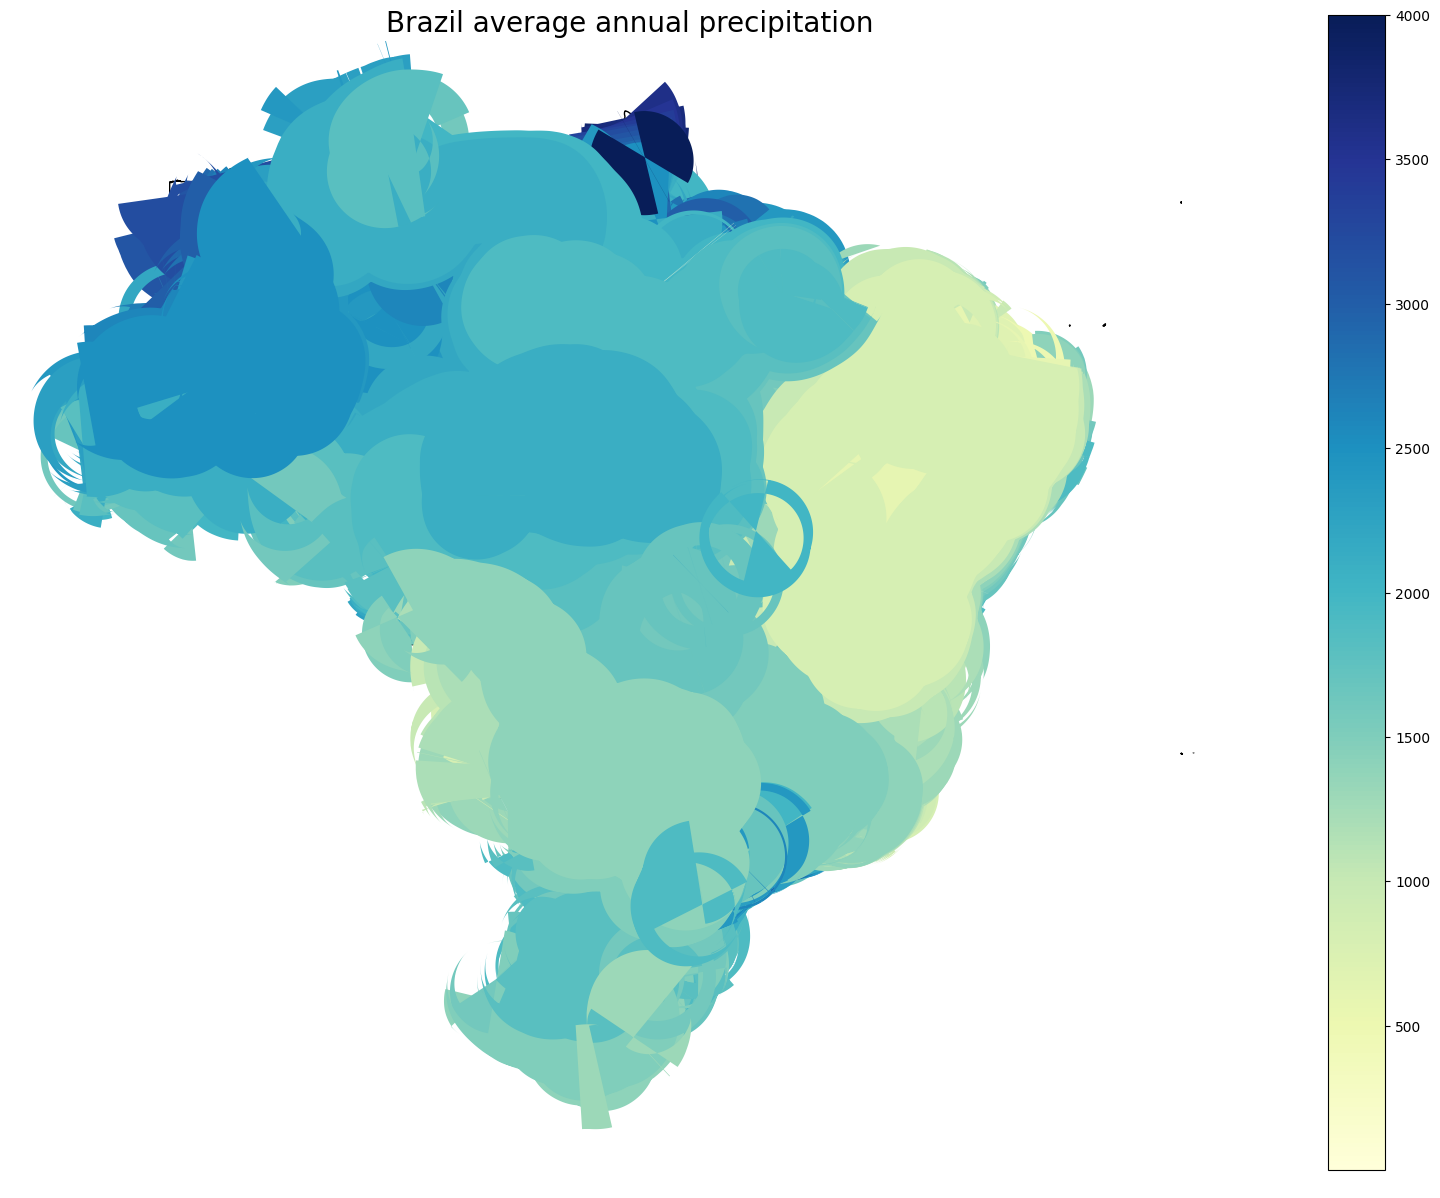

In [6]:
fig, gax = plt.subplots(figsize=(20, 15))

plt.title("Brazil average annual precipitation", fontsize=20)

estados.plot(
    ax=gax,
    edgecolor='black',
    color='white',
    linewidth=1
)

precipitacao.plot(
    ax=gax,
    #edgecolor='blue',
    column='chuva_mm',
    linewidth=75,
    cmap='YlGnBu',
    legend=True,
    vmin=1,
    vmax=4000
)

gax.annotate('Volume (mm)', xy=(0.775, 0.1), xycoords='figure fraction')

plt.axis('off')
plt.savefig(path + '8_br_mean_rainfall.png')
plt.show()


#Distribuição da População Brasileira por Bacia Hidrográfica
Divisão de bacias hidrográficas no território nacional e a relação com o número de habitantes por quilômetro quadrado nesse espaço, pode influenciar na decisão de construção de uma usina.


Análise da densidade demográfica delimitada pelas bacias hidrográficas em território nacional, realizada no Censo de 2010 e fornecida pelo Instituto Brasileiro de Geografia e Estatística (IBGE).

Link: https://portaldemapas.ibge.gov.br/

In [7]:
dens_dem_bacia = gpd.read_file(path + 'C04_densidade_demog_por_bacia_hidrografica_2010')
dens_dem_bacia['coordenadas'] = dens_dem_bacia['geometry'].centroid
dens_dem_bacia['Bacia'] = dens_dem_bacia['Bacia'].str.replace(r'Rio', '')
dens_dem_bacia = dens_dem_bacia.drop_duplicates(subset='Bacia', keep="last")
print(np.mean(dens_dem_bacia['DenPopBac']))
dens_dem_bacia.head()

50.56140350877193


<ipython-input-7-df9feb7b3776>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  dens_dem_bacia['coordenadas'] = dens_dem_bacia['geometry'].centroid


,Bacia,DenPopBac,geometry,coordenadas
0,Negro,3,"POLYGON ((-61.50786 4.32195, -61.52064 4.32556...",POINT (-63.68221 0.43107)
1,Oiapoque,1,"POLYGON ((-52.90546 2.18583, -52.88454 2.21842...",POINT (-51.54965 2.82225)
2,Apodi,34,"POLYGON ((-37.53994 -4.64362, -37.49599 -4.625...",POINT (-37.65101 -5.63799)
3,Araguari,1,"POLYGON ((-52.90514 2.18493, -52.89836 2.18999...",POINT (-51.59893 1.37712)
4,Capibaribe,327,"POLYGON ((-34.83468 -7.54994, -34.83780 -7.564...",POINT (-35.63909 -7.92337)


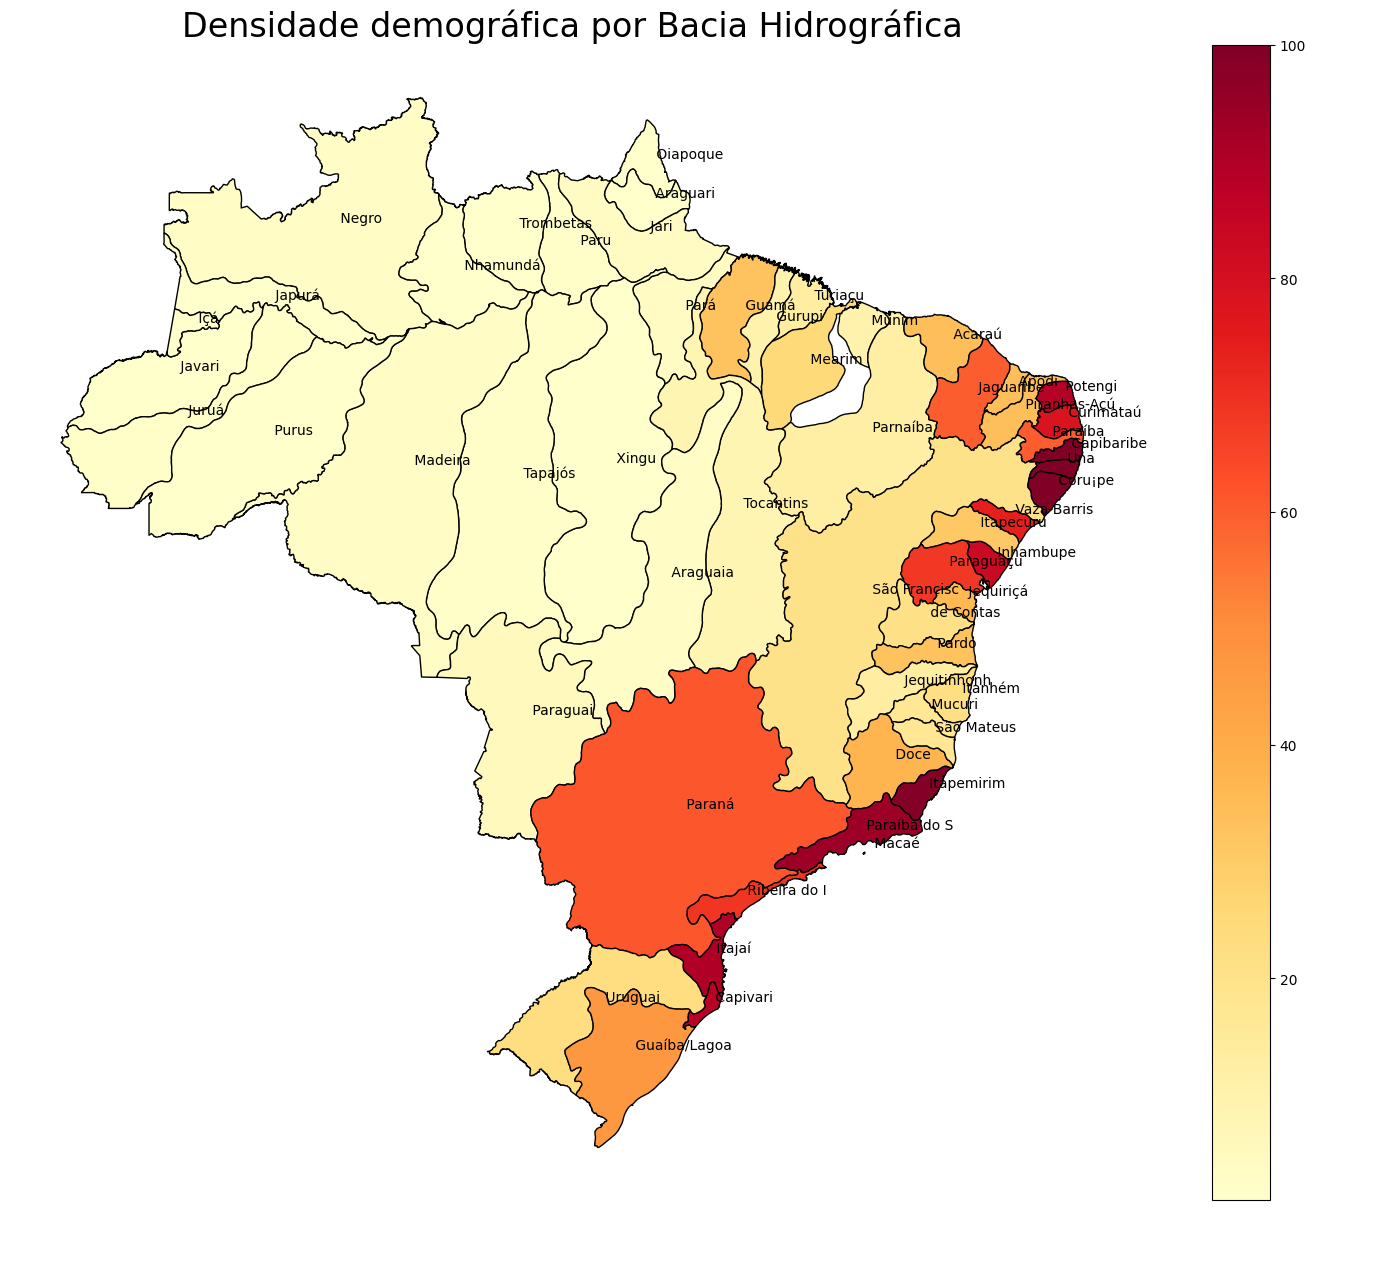

In [8]:
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Densidade demográfica por Bacia Hidrográfica", fontsize=24)
# Plot the counties and pass 'rel_trump_share' as the data to color
dens_dem_bacia.plot(
    ax=gax,
    edgecolor='black',
    column='DenPopBac',
    legend=True,
    cmap='YlOrRd',
    vmin=1, vmax=100
    )
gax.annotate('(Habitantes / Km²)',xy=(0.8, 0.06),  xycoords='figure fraction')

plt.axis('off')

for x, y, label in zip(dens_dem_bacia['coordenadas'].x, dens_dem_bacia['coordenadas'].y, dens_dem_bacia['Bacia']):
    gax.annotate(label, xy=(x,y), xytext=(4,4), textcoords='offset points')

plt.show()

#Produção Energética por estados
Quanto cada estado gera de energia em Megawatts, onde cada usina hidrelétrica está localizada e qual o seu potencial energético.

Análise do potencial de geração de energia por unidade federativa, com base na capacidade das hidrelétricas situadas no estado. Foi realizada a junção de uma base de delimitação territorial proveniente do IBGE para georeferenciar os campos e a base de dados das hidrelétricas citada anteriormente, para agrupar as usinas por estado e definir o peso a partir da potencia em MegaWatts.

Link: https://portaldemapas.ibge.gov.br/portal.php#mapa207950

In [9]:
hidreletricas_geo = gpd.read_file(path + 'LE2015_00_potencia_usina_hidreletrica.csv')
hidreletricas_geo = hidreletricas_geo[['usina', 'p_out_mw', 'geom']]
hidreletricas_geo.rename(columns = {'geom':'geometry', 'p_out_mw':'potencia_MW'}, inplace = True)
hidreletricas_geo['potencia_MW'] = pd.to_numeric(hidreletricas_geo['potencia_MW'])
hidreletricas_geo['geometry'] = gpd.GeoSeries.from_wkt(hidreletricas_geo['geometry'])
hidreletricas_geo = gpd.GeoDataFrame(hidreletricas_geo, geometry='geometry')
hidreletricas_geo.sort_values('potencia_MW',
                      inplace=True,
                      ascending=False)
hidreletricas_geo.head()

,usina,potencia_MW,geometry
101,Tucuruí I e II,8535.0,MULTIPOINT (-49.65222 -3.83222)
111,Itaipu (Parte Brasileira),7000.0,MULTIPOINT (-54.59306 -25.42694)
82,Jirau,3750.0,MULTIPOINT (-64.73444 -9.33111)
65,Ilha Solteira,3444.0,MULTIPOINT (-51.36361 -20.38222)
117,Xingó,3162.0,MULTIPOINT (-37.79237 -9.62089)


In [10]:
hidreletricas = gpd.read_file(path + 'hidreletricas.csv')
hidreletricas = hidreletricas[['CodUsina', 'Usina', 'UF', 'Potência Outorgada (kW)', 'Sistema', 'Fase']]
hidreletricas.rename(columns = {'Potência Outorgada (kW)':'potencia_MW'}, inplace = True)
hidreletricas = hidreletricas[hidreletricas.UF != '']
hidreletricas = hidreletricas[hidreletricas.potencia_MW != '']
hidreletricas = hidreletricas[hidreletricas.potencia_MW != 'Operação']
hidreletricas['potencia_MW'] = pd.to_numeric(hidreletricas['potencia_MW'])
hidreletricas['potencia_MW'] = hidreletricas['potencia_MW'] / 1000
hidreletricas.head()

,CodUsina,Usina,UF,potencia_MW,Sistema,Fase
0,1,CAMARGOS,MG,46.00,1 - Sudeste,Operação
1,2,ITUTINGA,MG,52.00,1 - Sudeste,Operação
2,6,FURNAS,MG,1216.00,1 - Sudeste,Operação
3,7,M. DE MORAES,MG,476.00,1 - Sudeste,Operação
4,8,ESTREITO,SC,2.16,1 - Sudeste,Operação


In [11]:
hidreletricas_estados = hidreletricas.groupby(['UF']).sum()
hidreletricas_estados = pd.merge(estados, hidreletricas_estados, on=['UF'], how='left')
hidreletricas_estados.head()

<ipython-input-11-dd1533c8c4a5>:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  hidreletricas_estados = hidreletricas.groupby(['UF']).sum()


,estado,UF,geometry,coordenadas,potencia_MW
0,Bahia,BA,"MULTIPOLYGON (((-38.71080 -17.96966, -38.70848...",POINT (-41.72018 -12.47296),4928.911
1,Pará,PA,"MULTIPOLYGON (((-46.45928 -0.90961, -46.45936 ...",POINT (-53.06254 -3.97218),22330.700
2,Rio de Janeiro,RJ,"MULTIPOLYGON (((-43.55929 -23.08050, -43.55938...",POINT (-42.66308 -22.19582),799.887
3,São Paulo,SP,"MULTIPOLYGON (((-45.13777 -23.79018, -45.13777...",POINT (-48.72945 -22.26441),12612.846
4,Espírito Santo,ES,"MULTIPOLYGON (((-28.85365 -20.47547, -28.85372...",POINT (-40.66811 -19.57476),280.000


<Figure size 640x480 with 0 Axes>

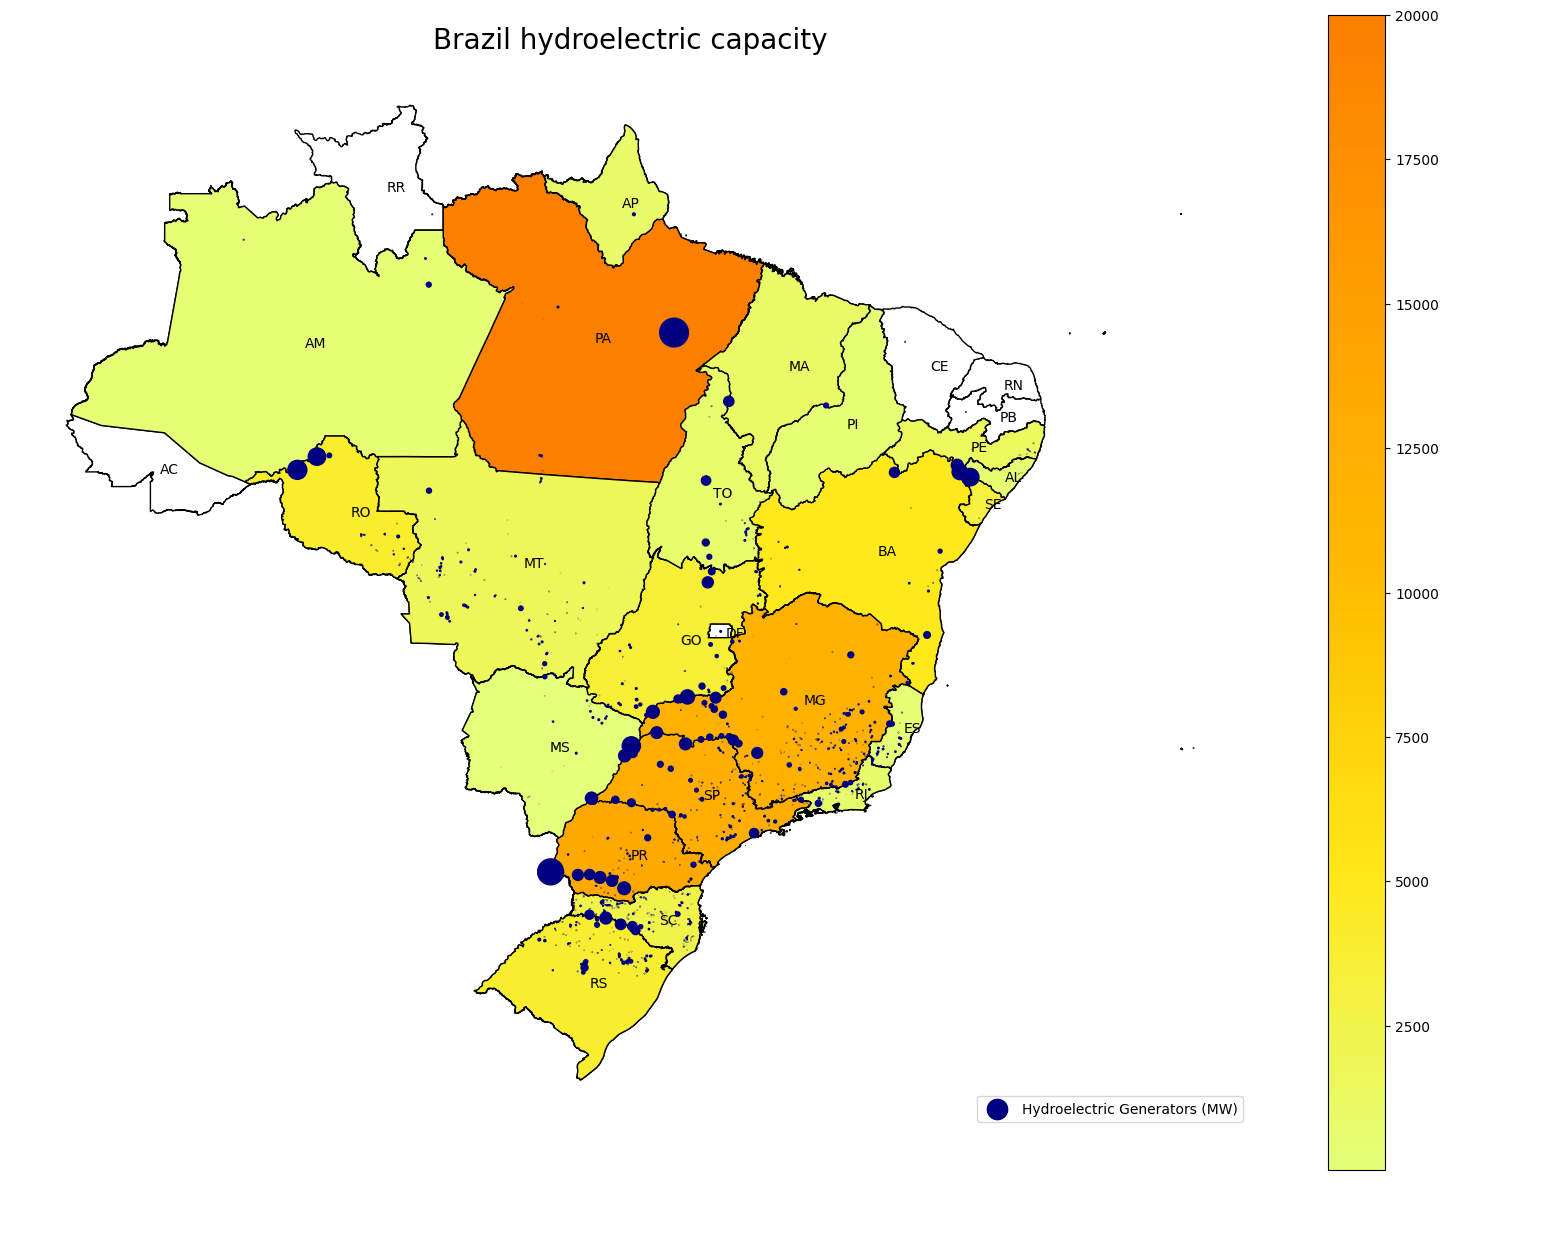

In [12]:
csfont = {'fontname':'IBM Plex Mono, monospace'}
fig = plt.figure()
fig, gax = plt.subplots(figsize = (20,15))
plt.title("Brazil hydroelectric capacity", fontsize=20, **csfont)
estados.plot(
    ax=gax,
    edgecolor='black',
    color='white',
    linewidth=1
    )

hidreletricas_estados.plot(
    ax=gax,
    edgecolor='black',
    column='potencia_MW',
    linewidth=1,
    cmap='Wistia',
    legend=True,
    vmin=1, vmax=20000
    )

hidreletricas_geo.plot(ax=gax,
                       marker='o',
                       color='navy',
                       legend=True,
                       label='Hydroelectric Generators (MW)',
                       markersize=hidreletricas_geo['potencia_MW']*0.05)
gax.legend(loc='lower right')

gax.annotate('States Hydropower (MW)',xy=(0.8, 0.06),  xycoords='figure fraction')
for x, y, label in zip(hidreletricas_estados['coordenadas'].x, hidreletricas_estados['coordenadas'].y, hidreletricas_estados['UF']):
    gax.annotate(label, xy=(x,y-0.5), xytext=(4,4), textcoords='offset points')

plt.axis('off')
plt.savefig(path + '2_br_hidropower_cap.png')
plt.show()